In [13]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

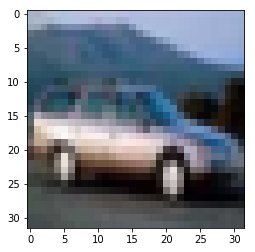

In [16]:
plt.imshow(x_train[4])

In [5]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# if not data_augmentation:
   # print('Not using data augmentation.')
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


pickle_out = open("output.pickle","wb")
pickle.dump(hist.history, pickle_out)
pickle_out.close()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 14s 282us/step - loss: 1.8502 - acc: 0.3218 - val_loss: 1.5532 - val_acc: 0.4439
Epoch 2/2
50000/50000 [==============================] - 14s 271us/step - loss: 1.5026 - acc: 0.4542 - val_loss: 1.3374 - val_acc: 0.5209


In [7]:
hist.history

{'val_loss': [1.553161431503296, 1.3373869338989257],
 'val_acc': [0.4439, 0.5209],
 'loss': [1.850246098060608, 1.5026328351593017],
 'acc': [0.3218, 0.4542]}

In [10]:
import pickle
pickle_out = open("output.pickle","wb")
pickle.dump(hist.history, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("output.pickle","rb")
example_dict = pickle.load(pickle_in)


In [12]:
example_dict

{'val_loss': [1.553161431503296, 1.3373869338989257],
 'val_acc': [0.4439, 0.5209],
 'loss': [1.850246098060608, 1.5026328351593017],
 'acc': [0.3218, 0.4542]}

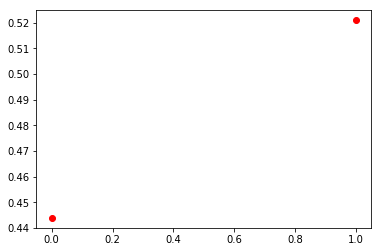

In [17]:
plt.plot(hist.history['val_acc'], 'ro')

In [19]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_5", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Activation", "config": {"name": "activation_7", "trainable": true, "activation": "relu"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_6", "trainable": true, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": 

In [20]:
model.get_weights()

[array([[[[-3.46966721e-02,  8.96508768e-02,  5.72490618e-02,
            4.93601374e-02, -7.60279149e-02, -7.57424831e-02,
            1.02665916e-01, -4.57071625e-02,  7.98673276e-03,
           -1.16025299e-01, -3.91817726e-02, -8.28599483e-02,
           -1.17526883e-02,  3.01130228e-02, -1.91718887e-03,
            5.69877625e-02,  1.73618253e-02,  6.90634027e-02,
           -1.23024367e-01, -9.47369635e-02,  2.05527786e-02,
            6.79392219e-02, -5.30439802e-02, -1.22542158e-01,
            1.82004888e-02, -1.44682936e-02, -1.17861584e-01,
           -2.95039061e-02, -6.06582947e-02,  6.30204529e-02,
           -1.23027980e-01,  2.42689066e-02],
          [ 1.00480594e-01, -1.09611288e-01, -3.57341506e-02,
            1.38727231e-02, -8.38043690e-02,  8.99092555e-02,
           -1.12318426e-01, -5.48503222e-03, -3.92380953e-02,
           -2.11949926e-02,  5.19176796e-02, -8.71951580e-02,
           -8.21484774e-02,  3.77611145e-02,  3.22648808e-02,
           -1.36614457e-